# Sample case 1d cell

In [23]:
# if juyter notebook autocompletion won't work, this might help
%config Completer.use_jedi = False

In [24]:
# Get the libraries
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## reference
(from https://github.com/libAtoms/matscipy/tree/master/examples/electrochemistry/pnp_batch/cell_1d)

In [25]:
import scipy.constants as const

In [26]:
# SI units
ref_potential_difference_SI = 0.01  # V
ref_concentration_SI = np.array([1000, 1000])  # mM or mol/m^3
ref_number_charges = np.array([1,-1])
ref_domain_size_SI = 2e-8  # mM

average_concentration_SI = 1000
thermal_voltage_SI = const.Boltzmann * 298 / const.elementary_charge
ionic_strength_SI = 0.5*np.sum(ref_concentration_SI*np.square(ref_number_charges))
debye_length_SI = np.sqrt(82*const.epsilon_0*const.Boltzmann*298/(2*const.Avogadro*const.elementary_charge**2*ionic_strength_SI))

In [27]:
thermal_voltage_SI

0.025679644404907293

In [28]:
ionic_strength_SI

1000.0

In [29]:
debye_length_SI

3.1083516608056579e-10

In [30]:
# dimensionless
ref_concentration = ref_concentration_SI / average_concentration_SI
ref_potential_difference = ref_potential_difference_SI / thermal_voltage_SI
ref_domain_size = ref_domain_size_SI / debye_length_SI

In [31]:
ref_potential_difference

0.3894134919597654

In [32]:
ref_domain_size

64.342784158521411

In [33]:
# reference data (SI units)

ref_dat_SI = np.loadtxt('samples/potential_sweep/data_std/NaCl_c_1000_1000_mM_z_+1_-1_l_20e-9_m_u_0.01_V.txt')
ref_x_SI = ref_dat_SI[:,0]
ref_potential_SI = ref_dat_SI[:,1]
ref_concentration_SI = ref_dat_SI[:,2:]

In [34]:
ref_concentration_SI.shape

(201, 2)

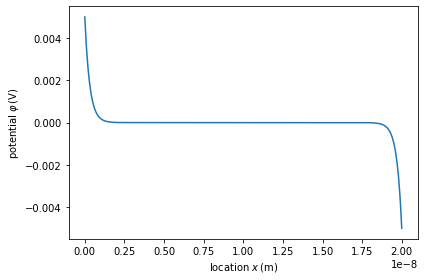

In [35]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ref_x_SI, ref_potential_SI)
ax.set_ylabel(r'potential $\varphi\, (\mathrm{V})$')
ax.set_xlabel(r'location $x\, (\mathrm{m})$')
fig.tight_layout()

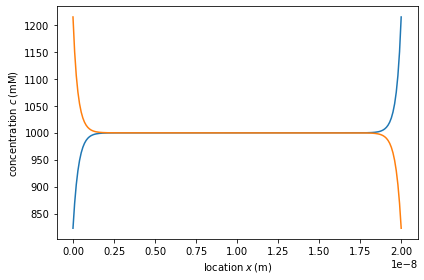

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ref_x_SI, ref_concentration_SI[:,0], ref_x_SI, ref_concentration_SI[:,1])
ax.set_ylabel(r'concentration $c\, (\mathrm{mM})$')
ax.set_xlabel(r'location $x\, (\mathrm{m})$')
fig.tight_layout()

In [37]:
# reference data (dimensionless)

ref_x = ref_x_SI / debye_length_SI
ref_potential = ref_potential_SI / thermal_voltage_SI
ref_concentration = ref_concentration_SI / average_concentration_SI

In [38]:
ref_concentration.shape

(201, 2)

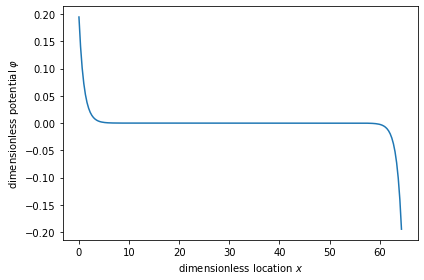

In [39]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ref_x, ref_potential)
ax.set_ylabel(r'dimensionless potential $\varphi$')
ax.set_xlabel(r'dimensionless location $x$')
fig.tight_layout()

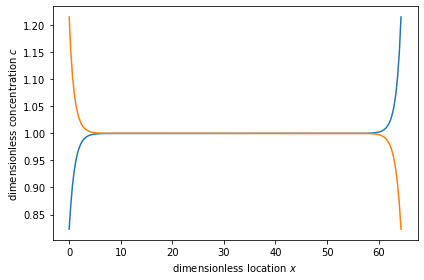

In [40]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ref_x, ref_concentration[:,0], ref_x, ref_concentration[:,1])
ax.set_ylabel(r'dimensionless concentration $c$')
ax.set_xlabel(r'dimensionless location $x$')
fig.tight_layout()